# Meadow Creek SWMM Model LID Scenario Automation 

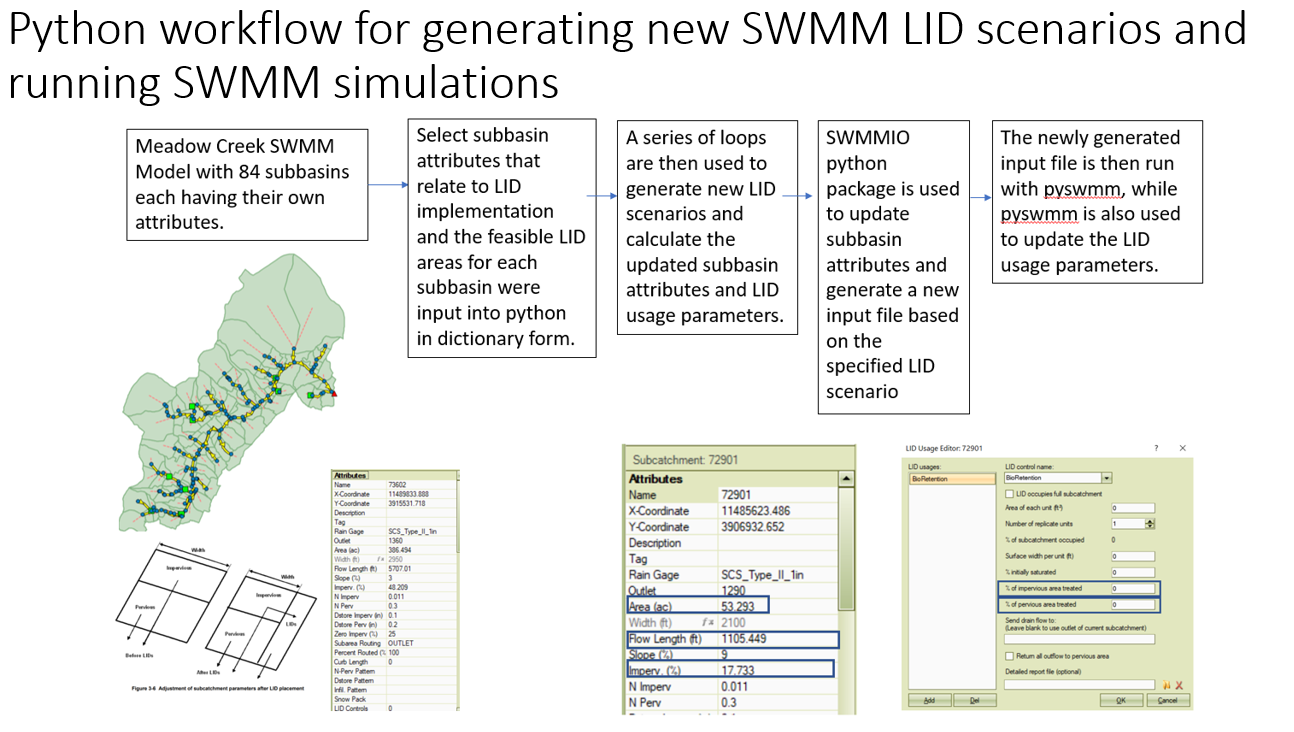

In [1]:
import IPython
from IPython import display
display.Image(r"C:\Users\R. Seth Herbst\Desktop\workflow.PNG")

# Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments
import os
import swmmio as sio

# SWMM Model Basin Specific Dictionaries 
## These dictionaries will be referenced throughout the code and used to calculate new parameters that accompany new LIDs in SWMM

## The following dictionares contain characteristics for each individual subbasin

In [3]:
#Subbasin Characteristic Dictionaries
subbasin_areas = {'72591': 930398.04, '72631': 952047.36, '72671': 1011681.0, '72731': 954530.28, '72781': 1649965.68, '72951': 1785524.4, '73081': 1531569.6, '73121': 1481911.2, '73171': 677488.68, '73181': 626044.32, '73201': 922731.48, '73211': 1332718.2, '73301': 1379980.8, '73321': 629311.32, '73391': 762430.68, '73421': 672827.76, '73461': 708067.8, '73531': 677662.92, '73551': 603218.88, '73571': 368648.28}
subbasin_imperv_areas = {'72591': 230720.106, '72631': 418386.7328, '72671': 294287.8861, '72731': 506340.1323, '72781': 530480.4658, '72951': 419348.2606, '73081': 545667.6171, '73121': 717393.2119, '73171': 390782.2455, '73181': 431162.9836, '73201': 494805.5288, '73211': 431094.3562, '73301': 632569.3989, '73321': 437044.1255, '73391': 164067.458, '73421': 504230.5799, '73461': 532764.3741, '73531': 469972.7883, '73551': 412975.7096, '73571': 253029.1199}
subbasin_perv_areas = {'72591': 699677.934, '72631': 533660.6272, '72671': 717393.1139, '72731': 448190.1477, '72781': 1119485.214, '72951': 1366176.139, '73081': 985901.9829, '73121': 764517.9881, '73171': 286706.4345, '73181': 194881.3364, '73201': 427925.9512, '73211': 901623.8438, '73301': 747411.4011, '73321': 192267.1945, '73391': 598363.222, '73421': 168597.1801, '73461': 175303.4259, '73531': 207690.1317, '73551': 190243.1704, '73571': 115619.1601}
subbasin_flowlengths = {'72591': 1094.586, '72631': 793.373, '72671': 1445.259, '72731': 1272.707, '72781': 1833.295, '72951': 915.654, '73081': 957.231, '73121': 4234.032, '73171': 615.899, '73181': 2086.814, '73201': 1419.587, '73211': 1665.898, '73301': 2759.962, '73321': 968.171, '73391': 476.519, '73421': 480.591, '73461': 708.068, '73531': 1042.558, '73551': 928.029, '73571': 1053.281}

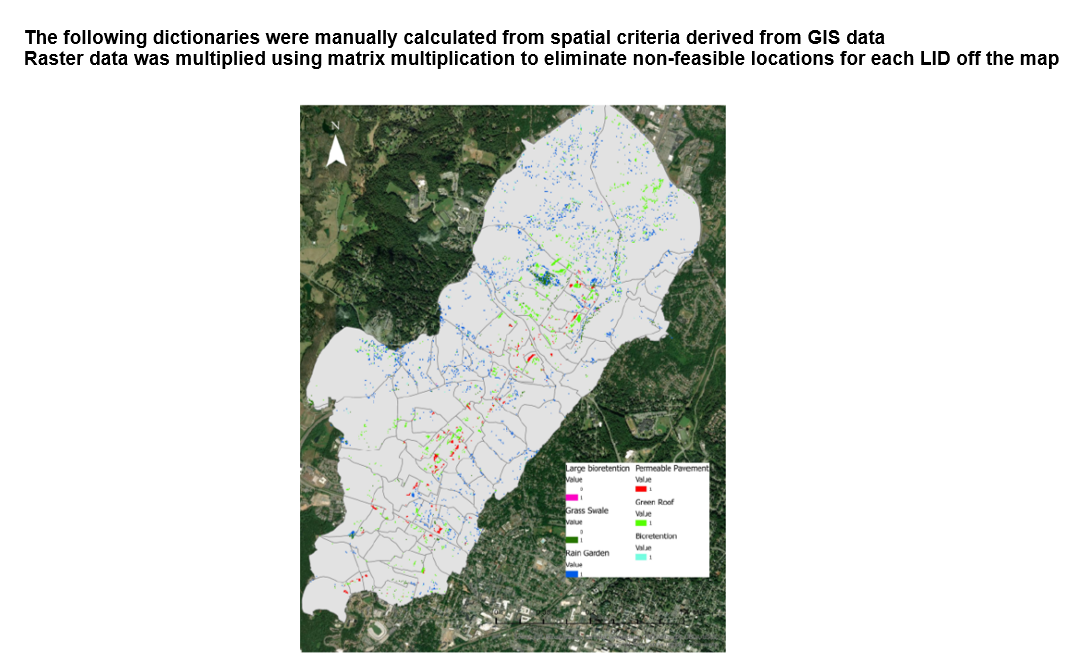

In [4]:
display.Image(r"C:\Users\R. Seth Herbst\Downloads\FEASIBLE LID SPACE.png")

In [5]:
#Subbasin LID Feasble Area Dictionaries
raingarden_feasible_areas = {'72591': 55583.9368, '72631': 19815.3296, '72671': 44162.83, '72731': 21000.83666, '72781': 23024.24035, '72951': 43306.46711, '73081': 13920.64411, '73121': 23892.97048, '73171': 0.0, '73181': 3385.30813, '73201': 9353.089577, '73211': 12806.63365, '73301': 636.1767258, '73321': 671.0354, '73391': 9520.57, '73421': 0.0, '73461': 5787.304599, '73531': 20854.943, '73551': 11511.16, '73571': 8611.12}
permeablepavement_feasible_areas = {'72591': 0.0, '72631': 3592.054222, '72671': 0.0, '72731': 9935.438827, '72781': 12553.53077, '72951': 14386.89196, '73081': 9687.51, '73121': 12827.45501, '73171': 9776.734992, '73181': 7534.73, '73201': 30138.92, '73211': 1076.39, '73301': 17222.24, '73321': 6647.736192, '73391': 1076.39, '73421': 7345.333808, '73461': 25833.36, '73531': 32600.9754, '73551': 0.0, '73571': 20832.98346}
greenroof_feasible_areas = {'72591': 2152.78, '72631': 12921.38023, '72671': 1173.503467, '72731': 29062.53, '72781': 7534.73, '72951': 9687.51, '73081': 21384.84111, '73121': 9357.285313, '73171': 16289.43527, '73181': 6990.681118, '73201': 30615.11554, '73211': 1296.256317, '73301': 16630.5235, '73321': 26148.32693, '73391': 0.0, '73421': 20630.7033, '73461': 71257.33823, '73531': 52908.96152, '73551': 10049.59107, '73571': 37450.83357}
bioretention_feasible_areas = {'72591': 1076.39, '72631': 1076.39, '72671': 1076.39, '72731': 3229.17, '72781': 7.996802699, '72951': 1068.393197, '73081': 0.0, '73121': 5381.95, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 1076.39, '73421': 0.0, '73461': 0.0, '73531': 1076.39, '73551': 0.0, '73571': 4305.56}
grassswale_feasible_areas = {'73081': 7534.73, '72671': 0.0, '72591': 2152.78, '72631': 3229.17, '72781': 0.0, '72731': 0.0, '72951': 10763.9, '73211': 0.0, '73181': 0.0, '73171': 0.0, '73121': 2152.78, '73201': 0.0, '73301': 0.0, '73321': 0.0, '73391': 10096.5382, '73461': 0.0, '73421': 0.0, '73551': 0.0, '73531': 0.0, '73571': 5177.4359}


## The next dictionaries are standard select LID surface areas used to treat a standard drainage area. Raingarden, bioretention, and grassswale surface area requirements vary by subbasin based on runoff coefficients. 

In [6]:
#Other LID Dictionaries
raingarden_standard_surfaceareas = {'72591': 616.6014319, '72631': 871.622691, '72671': 699.6268099, '72731': 762.1321942, '72781': 695.4204566, '72951': 567.673537, '73081': 765.5796487, '73121': 816.0431198, '73171': 913.0600918, '73181': 1017.27915, '73201': 936.7333456, '73211': 598.6061559, '73301': 950.2543445, '73321': 1105.661561, '73391': 677.1456018, '73421': 1137.466808, '73461': 1138.968494, '73531': 1058.328457, '73551': 1058.44356, '73571': 1112.715481}
bioretention_standard_surfaceareas = {'72591': 3212.817987, '72631': 4541.612969, '72671': 3645.423904, '72731': 3971.109854, '72781': 3623.50659, '72951': 2957.877903, '73081': 3989.072906, '73121': 4252.014151, '73171': 4757.523636, '73181': 5300.559781, '73201': 4880.873748, '73211': 3119.053128, '73301': 4951.325269, '73321': 5761.078663, '73391': 3528.284978, '73421': 5926.800739, '73461': 5934.625311, '73531': 5514.448276, '73551': 5515.048024, '73571': 5797.833294}
grassswale_standard_surfaceareas = {'72591': 7460.877325, '72631': 10546.63456, '72671': 8465.4844, '72731': 9221.799549, '72781': 8414.587525, '72951': 6868.849797, '73081': 9263.513749, '73121': 9874.12175, '73171': 11048.02711, '73181': 12309.07771, '73201': 11334.47348, '73211': 7243.134487, '73301': 11498.07757, '73321': 13378.50489, '73391': 8193.461781, '73421': 13763.34838, '73461': 13781.51878, '73531': 12805.77433, '73551': 12807.16708, '73571': 13463.85732}



# LID Area Scenario Generator. Can only run one of these. Must comment out the option that isnt being used!
# This is the only section that needs to be modified by the user to run different LID scenarios.

## Option 1: Manually Change in Block Below

In [7]:
# raingarden_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# permeablepavement_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# greenroof_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# bioretention_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# grassswale_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}

## Option 2: Random LID Area allocation. 
## Example Setting: "allocations_fractions_list = [0,0.5,1]" will assign each LID areas to subbasin based on the fraction for each subbasin chosen randomly between 0%, 50%, and 100% feasible area for each LID
## This option can also be used to generate subbasin wide %implementation scenarios for example, setting: "allocations_fractions_list = [0.5] " will set all LID areas to 50% feasible capacity for each subbasin

In [8]:
#Generating random area allocation scenarios for each subcatchment. 
### Random LID scenario generator.  

allocations_fractions_list = [0.25,0.5,0.75,1]

for key in raingarden_feasible_areas:
    raingarden_assigned_areas = raingarden_feasible_areas
    raingarden_assigned_areas[key] *= random.choice(allocations_fractions_list)
            

for key in greenroof_feasible_areas:
    greenroof_assigned_areas = greenroof_feasible_areas
    greenroof_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
    
for key in permeablepavement_feasible_areas:
    permeablepavement_assigned_areas = permeablepavement_feasible_areas
    permeablepavement_assigned_areas[key] *= random.choice(allocations_fractions_list)
    

for key in bioretention_feasible_areas:
    bioretention_assigned_areas = bioretention_feasible_areas
    bioretention_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
    
for key in grassswale_feasible_areas:
    grassswale_assigned_areas = grassswale_feasible_areas
    grassswale_assigned_areas[key] *= random.choice(allocations_fractions_list)



In [9]:
#print(raingarden_feasible_areas)
print(greenroof_assigned_areas)
print(permeablepavement_assigned_areas)
print(bioretention_assigned_areas)

{'72591': 538.195, '72631': 3230.3450575, '72671': 880.12760025, '72731': 7265.6325, '72781': 1883.6825, '72951': 9687.51, '73081': 21384.84111, '73121': 4678.6426565, '73171': 4072.3588175, '73181': 5243.0108385, '73201': 15307.55777, '73211': 648.1281585, '73301': 12472.892625, '73321': 13074.163465, '73391': 0.0, '73421': 10315.35165, '73461': 71257.33823, '73531': 39681.721139999994, '73551': 10049.59107, '73571': 28088.125177500002}
{'72591': 0.0, '72631': 898.0135555, '72671': 0.0, '72731': 7451.57912025, '72781': 9415.1480775, '72951': 14386.89196, '73081': 4843.755, '73121': 12827.45501, '73171': 7332.551244, '73181': 3767.365, '73201': 22604.19, '73211': 538.195, '73301': 17222.24, '73321': 3323.868096, '73391': 807.2925, '73421': 7345.333808, '73461': 25833.36, '73531': 32600.9754, '73551': 0.0, '73571': 20832.98346}
{'72591': 538.195, '72631': 807.2925, '72671': 538.195, '72731': 2421.8775, '72781': 5.99760202425, '72951': 534.1965985, '73081': 0.0, '73121': 5381.95, '73171'

## Calculate total implemented LID areas for each subbasin

In [10]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
lid_total_areas = dict.fromkeys(subbasinlist)

for key in lid_total_areas:
    lid_total_areas[key] = greenroof_assigned_areas[key] + permeablepavement_assigned_areas[key] + raingarden_assigned_areas[key] + bioretention_assigned_areas[key] + grassswale_assigned_areas[key]

print(lid_total_areas)

{'72591': 15510.5692, '72631': 18072.485913, '72671': 12459.03010025, '72731': 32889.71661525, '72781': 17060.88826702425, '72951': 62470.398891, '73081': 42320.1266925, '73121': 48395.60314649999, '73171': 11404.9100615, '73181': 10703.0299035, '73201': 40250.02016425, '73211': 10791.298395999998, '73301': 30013.2209879, '73321': 17069.066961, '73391': 15645.2291, '73421': 17660.685458, '73461': 101431.17667925, '73531': 88462.09878999999, '73551': 15805.17107, '73571': 59902.977612500006}


## Update impervious LID areas for each subbasin after LID implementation
## This block appears periodically to reset the updated subbasin impervious area dictionary

In [11]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


# Permeable Pavement LID Usage Editor Parameter Changes!
## Permeable Pavement Percent Impervious Treated Calculation for each Subbasin

In [12]:
permeablepavement_percimpervtreated = subbasindict

for key in permeablepavement_percimpervtreated:
    permeablepavement_percimpervtreated[key] = ((permeablepavement_assigned_areas[key] * 2.5) / updated_sb_impervious_areas[key])*100
print(permeablepavement_percimpervtreated)    

{'72591': 0.0, '72631': 0.5419404962316035, '72671': 0.0, '72731': 3.7892756861025516, '72781': 4.533648456895559, '72951': 9.099319146414272, '73081': 2.33124332417705, '73121': 4.581972845738248, '73171': 4.83196448433374, '73181': 2.2310444912189293, '73201': 12.368405381357004, '73211': 0.31297100695722924, '73301': 7.14172131877997, '73321': 1.9754540360013482, '73391': 1.2362055641797078, '73421': 3.7740383714161228, '73461': 14.823801293716663, '73531': 20.493957528412725, '73551': 0.0, '73571': 25.51710652014418}


# Percent Impervious area and Percent Pervious area treated changes according to total LID area implemented



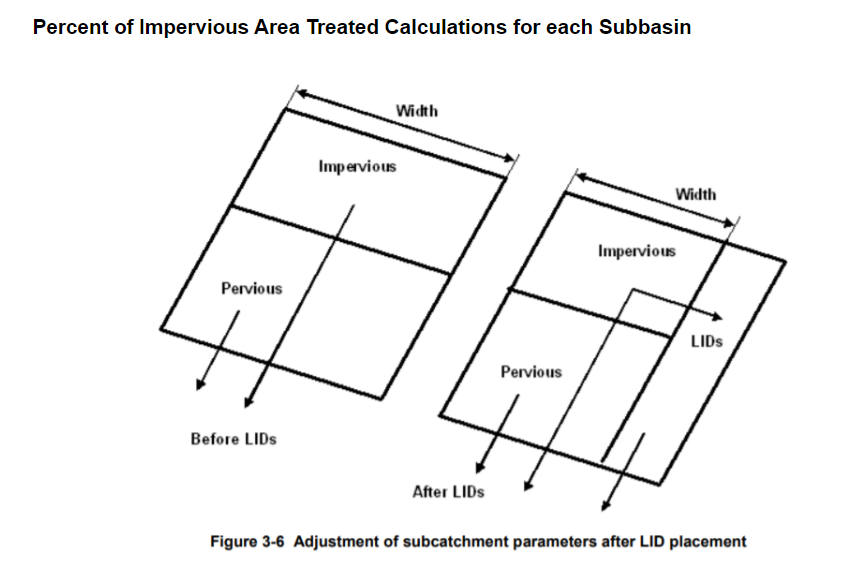

In [101]:
display.Image(r"C:\Users\R. Seth Herbst\Downloads\LID Widths.png")

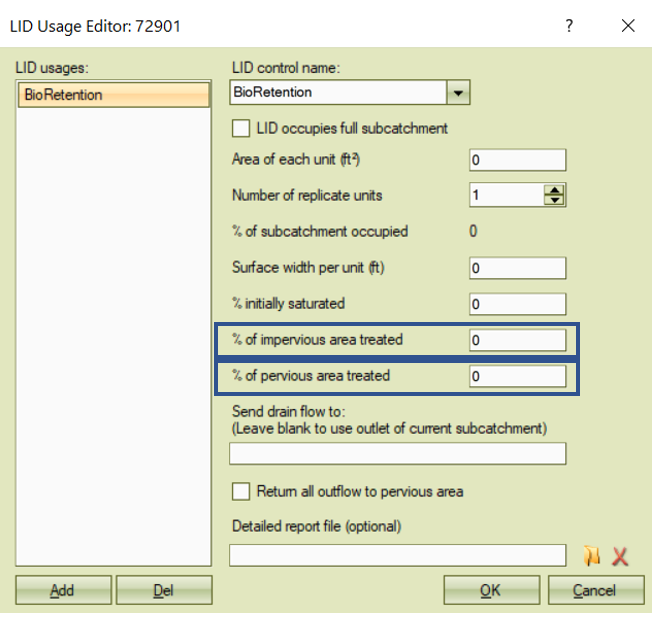

In [14]:
display.Image(r"C:\Users\R. Seth Herbst\Downloads\LID usage editor changes.png")

# Following blocks calculate updated percent impervious area treated and percent impervious  changes for each subbasin based on LID scenario


## RainGarden LID Usage Editor Parameter Changes!

### Calculations for RainGarden Percent Impervious Area Treated for each Subbasin

In [15]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [16]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

{'72591': 22.536412471798545, '72631': 11.366919313026466, '72671': 15.78085251132398, '72731': 20.666529527115994, '72781': 8.277093422937424, '72951': 57.21572033134952, '73081': 13.637357132244258, '73121': 29.279053888544286, '73171': 0.0, '73181': 1.6639032314778102, '73201': 2.496198523553446, '73211': 16.045567094209026, '73301': 0.33474023532864783, '73321': 0.6069085004574922, '73391': 14.059856513417879, '73421': 0.0, '73461': 3.8108854389873934, '73531': 14.779161560426603, '73551': 5.437776956194056, '73571': 7.738833643494533}


In [17]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

{'72591': 490843.0636357723, '72631': 247571.50263771645, '72671': 343706.9676966363, '72731': 450117.01310058637, '72781': 180275.0947515771, '72951': 1246158.3888167925, '73081': 297021.6383402799, '73121': 637697.7936924945, '73171': 0.0, '73181': 36239.81238158671, '73201': 54367.20384299406, '73211': 349472.4513118726, '73301': 7290.6423254579495, '73321': 13218.467139964181, '73391': 306223.6748622414, '73421': 0.0, '73461': 83001.08486114543, '73531': 321890.1387860914, '73551': 118434.78210590653, '73571': 168551.79675531093}


In [18]:
raingarden_impervareatreated = subbasindict

for key in raingarden_impervareatreated:
    quarter = 0.25
    raingarden_impervareatreated[key] = totaldrainageareatreated[key] * quarter
print(raingarden_impervareatreated)

{'72591': 122710.76590894308, '72631': 61892.87565942911, '72671': 85926.74192415907, '72731': 112529.25327514659, '72781': 45068.773687894274, '72951': 311539.59720419813, '73081': 74255.40958506998, '73121': 159424.44842312363, '73171': 0.0, '73181': 9059.953095396677, '73201': 13591.800960748515, '73211': 87368.11282796814, '73301': 1822.6605813644874, '73321': 3304.6167849910453, '73391': 76555.91871556034, '73421': 0.0, '73461': 20750.271215286357, '73531': 80472.53469652285, '73551': 29608.695526476633, '73571': 42137.94918882773}


In [19]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [20]:
raingarden_percimpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percimpervareatreated[key] = (raingarden_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(raingarden_percimpervareatreated)

{'72591': 53.31034283964351, '72631': 14.940645625063478, '72671': 29.285777023593017, '72731': 22.889342327562005, '72781': 8.680733413958228, '72951': 78.81613984696526, '73081': 14.295308320030795, '73121': 22.778594602034012, '73171': 0.0, '73181': 2.146132211154124, '73201': 2.9748273067118127, '73211': 20.322512284745862, '73301': 0.30232847598989804, '73321': 0.7856050092005048, '73391': 46.89197666871184, '73421': 0.0, '73461': 4.7628012350872435, '73531': 20.234986076818533, '73551': 7.348418026237262, '73571': 20.64492663868779}


In [21]:
for key in raingarden_percimpervareatreated:
    if raingarden_percimpervareatreated[key] > 100:
        raingarden_percimpervareatreated[key] = 100
print(raingarden_percimpervareatreated)

{'72591': 53.31034283964351, '72631': 14.940645625063478, '72671': 29.285777023593017, '72731': 22.889342327562005, '72781': 8.680733413958228, '72951': 78.81613984696526, '73081': 14.295308320030795, '73121': 22.778594602034012, '73171': 0.0, '73181': 2.146132211154124, '73201': 2.9748273067118127, '73211': 20.322512284745862, '73301': 0.30232847598989804, '73321': 0.7856050092005048, '73391': 46.89197666871184, '73421': 0.0, '73461': 4.7628012350872435, '73531': 20.234986076818533, '73551': 7.348418026237262, '73571': 20.64492663868779}


### Calculations for RainGarden Percent Pervious Area Treated for each Subbasin

In [22]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [23]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

{'72591': 22.536412471798545, '72631': 11.366919313026466, '72671': 15.78085251132398, '72731': 20.666529527115994, '72781': 8.277093422937424, '72951': 57.21572033134952, '73081': 13.637357132244258, '73121': 29.279053888544286, '73171': 0.0, '73181': 1.6639032314778102, '73201': 2.496198523553446, '73211': 16.045567094209026, '73301': 0.33474023532864783, '73321': 0.6069085004574922, '73391': 14.059856513417879, '73421': 0.0, '73461': 3.8108854389873934, '73531': 14.779161560426603, '73551': 5.437776956194056, '73571': 7.738833643494533}


In [24]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

{'72591': 490843.0636357723, '72631': 247571.50263771645, '72671': 343706.9676966363, '72731': 450117.01310058637, '72781': 180275.0947515771, '72951': 1246158.3888167925, '73081': 297021.6383402799, '73121': 637697.7936924945, '73171': 0.0, '73181': 36239.81238158671, '73201': 54367.20384299406, '73211': 349472.4513118726, '73301': 7290.6423254579495, '73321': 13218.467139964181, '73391': 306223.6748622414, '73421': 0.0, '73461': 83001.08486114543, '73531': 321890.1387860914, '73551': 118434.78210590653, '73571': 168551.79675531093}


In [25]:
raingarden_pervareatreated = subbasindict

for key in raingarden_pervareatreated:
    threequarter = 0.75
    raingarden_pervareatreated[key] = totaldrainageareatreated[key] * threequarter
print(raingarden_pervareatreated)

{'72591': 368132.29772682925, '72631': 185678.62697828733, '72671': 257780.22577247722, '72731': 337587.7598254398, '72781': 135206.32106368282, '72951': 934618.7916125944, '73081': 222766.22875520994, '73121': 478273.3452693709, '73171': 0.0, '73181': 27179.859286190032, '73201': 40775.402882245544, '73211': 262104.33848390443, '73301': 5467.981744093462, '73321': 9913.850354973136, '73391': 229667.75614668103, '73421': 0.0, '73461': 62250.813645859074, '73531': 241417.60408956854, '73551': 88826.0865794299, '73571': 126413.8475664832}


In [26]:
raingarden_percpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percpervareatreated[key] = (raingarden_pervareatreated[key]/subbasin_perv_areas[key])*100
print(raingarden_percpervareatreated)

{'72591': 52.61453589400023, '72631': 34.793390689604045, '72671': 35.9329105308934, '72731': 75.3224410571843, '72781': 12.07754415804931, '72951': 68.41129521532321, '73081': 22.5951699681088, '73121': 62.55880864987733, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 38.38266586288972, '73421': 0.0, '73461': 35.51032350124714, '73531': 116.23932351214765, '73551': 46.69081491475707, '73571': 109.3364174736668}


In [27]:
for key in raingarden_percpervareatreated:
    if raingarden_percpervareatreated[key] > 100:
        raingarden_percpervareatreated[key] = 100
print(raingarden_percpervareatreated)

{'72591': 52.61453589400023, '72631': 34.793390689604045, '72671': 35.9329105308934, '72731': 75.3224410571843, '72781': 12.07754415804931, '72951': 68.41129521532321, '73081': 22.5951699681088, '73121': 62.55880864987733, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 38.38266586288972, '73421': 0.0, '73461': 35.51032350124714, '73531': 100, '73551': 46.69081491475707, '73571': 100}


## Bioretention LID Usage Editor Parameter Changes!

### Percent of Impervious Area Treated Calculations for each Subbasin

In [28]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [29]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

{'72591': 0.1675149361643561, '72631': 0.17775457871694308, '72671': 0.14763577958916024, '72731': 0.609874213769358, '72781': 0.0016551928015811888, '72951': 0.18060130134452004, '73081': 0.0, '73121': 1.265741319025069, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 0.07626864090568367, '73421': 0.0, '73461': 0.0, '73531': 0.09759725235656559, '73551': 0.0, '73571': 0.18565383746268163}


In [30]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'72591': 27363.564822447566, '72631': 29036.210433412652, '72671': 24116.304595889327, '72731': 99622.95281922464, '72781': 270.3757441382872, '72951': 29501.22257462735, '73081': 0.0, '73121': 206758.84446274504, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 12458.482491943427, '73421': 0.0, '73461': 0.0, '73531': 15942.511172444989, '73551': 0.0, '73571': 30326.554349529044}


In [31]:
bioretention_impervareatreated = subbasindict

for key in bioretention_impervareatreated:
    bioretention_impervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_impervareatreated)

{'72591': 13681.782411223783, '72631': 14518.105216706326, '72671': 12058.152297944664, '72731': 49811.47640961232, '72781': 135.1878720691436, '72951': 14750.611287313675, '73081': 0.0, '73121': 103379.42223137252, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 6229.241245971713, '73421': 0.0, '73461': 0.0, '73531': 7971.2555862224945, '73551': 0.0, '73571': 15163.277174764522}


In [32]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [33]:
bioretention_percimpervareatreated = subbasindict

for key in bioretention_percimpervareatreated:
    bioretention_percimpervareatreated[key] = (bioretention_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(bioretention_percimpervareatreated)

{'72591': 5.943899914543581, '72631': 3.504601505086949, '72671': 4.1096910182608335, '72731': 10.132049242280997, '72781': 0.026038646765925683, '72951': 3.7317447043084013, '73081': 0.0, '73121': 14.77087092031852, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 3.8155304001402066, '73421': 0.0, '73461': 0.0, '73531': 2.004388781964683, '73551': 0.0, '73571': 7.429045572965423}


In [34]:
for key in bioretention_percimpervareatreated:
    if bioretention_percimpervareatreated[key] > 100:
        bioretention_percimpervareatreated[key] = 100
print(bioretention_percimpervareatreated)

{'72591': 5.943899914543581, '72631': 3.504601505086949, '72671': 4.1096910182608335, '72731': 10.132049242280997, '72781': 0.026038646765925683, '72951': 3.7317447043084013, '73081': 0.0, '73121': 14.77087092031852, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 3.8155304001402066, '73421': 0.0, '73461': 0.0, '73531': 2.004388781964683, '73551': 0.0, '73571': 7.429045572965423}


### Bioretention Percent Pervious Area Treated for each Subbasin

In [35]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [36]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

{'72591': 0.1675149361643561, '72631': 0.17775457871694308, '72671': 0.14763577958916024, '72731': 0.609874213769358, '72781': 0.0016551928015811888, '72951': 0.18060130134452004, '73081': 0.0, '73121': 1.265741319025069, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 0.07626864090568367, '73421': 0.0, '73461': 0.0, '73531': 0.09759725235656559, '73551': 0.0, '73571': 0.18565383746268163}


In [37]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'72591': 27363.564822447566, '72631': 29036.210433412652, '72671': 24116.304595889327, '72731': 99622.95281922464, '72781': 270.3757441382872, '72951': 29501.22257462735, '73081': 0.0, '73121': 206758.84446274504, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 12458.482491943427, '73421': 0.0, '73461': 0.0, '73531': 15942.511172444989, '73551': 0.0, '73571': 30326.554349529044}


In [38]:
bioretention_pervareatreated = subbasindict

for key in bioretention_pervareatreated:
    bioretention_pervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_pervareatreated)

{'72591': 13681.782411223783, '72631': 14518.105216706326, '72671': 12058.152297944664, '72731': 49811.47640961232, '72781': 135.1878720691436, '72951': 14750.611287313675, '73081': 0.0, '73121': 103379.42223137252, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 6229.241245971713, '73421': 0.0, '73461': 0.0, '73531': 7971.2555862224945, '73551': 0.0, '73571': 15163.277174764522}


In [39]:
bioretention_percpervareatreated = subbasindict

for key in bioretention_percpervareatreated:
    bioretention_percpervareatreated[key] = (bioretention_pervareatreated[key]/subbasin_perv_areas[key])*100
print(bioretention_percpervareatreated)

{'72591': 1.9554400312449731, '72631': 2.720475237770422, '72671': 1.6808291108890534, '72731': 11.113915971877649, '72781': 0.012075896168928195, '72951': 1.0797005500411303, '73081': 0.0, '73121': 13.5221700261486, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 1.0410468118596556, '73421': 0.0, '73461': 0.0, '73531': 3.8380521601944237, '73551': 0.0, '73571': 13.114848059482249}


In [40]:
for key in bioretention_percpervareatreated:
    if bioretention_percpervareatreated[key] > 100:
        bioretention_percpervareatreated[key] = 100
print(bioretention_percpervareatreated)

{'72591': 1.9554400312449731, '72631': 2.720475237770422, '72671': 1.6808291108890534, '72731': 11.113915971877649, '72781': 0.012075896168928195, '72951': 1.0797005500411303, '73081': 0.0, '73121': 13.5221700261486, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 1.0410468118596556, '73421': 0.0, '73461': 0.0, '73531': 3.8380521601944237, '73551': 0.0, '73571': 13.114848059482249}


## Grass Swale LID Usage Editor Parameter Changes!

### Percent of Impervious Area Treated Calculations for each Subbasin

In [41]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [42]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (grassswale_assigned_areas[key] / grassswale_standard_surfaceareas[key])
print(totalunits)

{'72591': 0.07213561844752621, '72631': 0.3061801356280235, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 0.7835300172600353, '73081': 0.6100328291313901, '73121': 0.16351682112892724, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 0.6161338436589212, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 0.09613582083028195}


In [43]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'72591': 11783.353273403407, '72631': 50014.52515483764, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 127989.62831942677, '73081': 99648.86263861257, '73121': 26710.472731410264, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 100645.46336168479, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 15703.786332626556}


In [44]:
grassswale_impervareatreated = subbasindict

for key in grassswale_impervareatreated:
    grassswale_impervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(grassswale_impervareatreated)

{'72591': 5891.6766367017035, '72631': 25007.26257741882, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 63994.81415971339, '73081': 49824.431319306284, '73121': 13355.236365705132, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 50322.73168084239, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 7851.893166313278}


In [45]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [46]:
grassswale_percimpervareatreated = subbasindict

for key in grassswale_percimpervareatreated:
    grassswale_percimpervareatreated[key] = (grassswale_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(grassswale_percimpervareatreated)

{'72591': 2.5595741260058023, '72631': 6.036634172211161, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 16.189994041067454, '73081': 9.591969279540413, '73121': 1.9081986357659226, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 30.823643677393182, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 3.8469304157861233}


In [47]:
for key in grassswale_percimpervareatreated:
    if grassswale_percimpervareatreated[key] > 100:
        grassswale_percimpervareatreated[key] = 100
print(grassswale_percimpervareatreated)

{'72591': 2.5595741260058023, '72631': 6.036634172211161, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 16.189994041067454, '73081': 9.591969279540413, '73121': 1.9081986357659226, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 30.823643677393182, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 3.8469304157861233}


### Percent of pervious Area Treated Calculations for each Subbasin

In [48]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [49]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (grassswale_assigned_areas[key] / grassswale_standard_surfaceareas[key])
print(totalunits)

{'72591': 0.07213561844752621, '72631': 0.3061801356280235, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 0.7835300172600353, '73081': 0.6100328291313901, '73121': 0.16351682112892724, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 0.6161338436589212, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 0.09613582083028195}


In [50]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'72591': 11783.353273403407, '72631': 50014.52515483764, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 127989.62831942677, '73081': 99648.86263861257, '73121': 26710.472731410264, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 100645.46336168479, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 15703.786332626556}


In [51]:
grassswale_pervareatreated = subbasindict

for key in grassswale_pervareatreated:
    grassswale_pervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(grassswale_pervareatreated)

{'72591': 5891.6766367017035, '72631': 25007.26257741882, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 63994.81415971339, '73081': 49824.431319306284, '73121': 13355.236365705132, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 50322.73168084239, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 7851.893166313278}


In [52]:
grassswale_percpervareatreated = subbasindict

for key in grassswale_percpervareatreated:
    grassswale_percpervareatreated[key] = (grassswale_pervareatreated[key]/subbasin_perv_areas[key])*100
print(grassswale_percpervareatreated)

{'72591': 0.8420555158885007, '72631': 4.685986056087073, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 4.684228653455745, '73081': 5.053690141970226, '73121': 1.7468832092356537, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 8.410064293831615, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 6.791169525468018}


In [53]:
for key in grassswale_percimpervareatreated:
    if grassswale_percimpervareatreated[key] > 100:
        grassswale_percimpervareatreated[key] = 100
print(grassswale_percpervareatreated)

{'72591': 0.8420555158885007, '72631': 4.685986056087073, '72671': 0.0, '72731': 0.0, '72781': 0.0, '72951': 4.684228653455745, '73081': 5.053690141970226, '73121': 1.7468832092356537, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 8.410064293831615, '73421': 0.0, '73461': 0.0, '73531': 0.0, '73551': 0.0, '73571': 6.791169525468018}


## Capping total %impervious and %pervious area treated at 100% for each subcatchment-LID combo. 

In [54]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
percimptreated_sbs = dict.fromkeys(subbasinlist)

for key in percimptreated_sbs:
    percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
print(percimptreated_sbs)  

{'72591': 61.81381688019289, '72631': 25.023821798593193, '72671': 33.39546804185385, '72731': 36.81066725594555, '72781': 13.240420517619713, '72951': 107.83719773875538, '73081': 26.218520923748258, '73121': 44.039637003856704, '73171': 4.83196448433374, '73181': 4.3771767023730535, '73201': 15.343232688068817, '73211': 20.635483291703093, '73301': 7.444049794769868, '73321': 2.761059045201853, '73391': 82.76735631042493, '73421': 3.7740383714161228, '73461': 19.58660252880391, '73531': 42.733332387195944, '73551': 7.348418026237262, '73571': 57.43800914758352}


In [55]:
while percimptreated_sbs['72671'] > 100:
    raingarden_percimpervareatreated['72671'] =  raingarden_percimpervareatreated['72671']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


{'72591': 61.81381688019289, '72631': 25.023821798593193, '72671': 33.39546804185385, '72731': 36.81066725594555, '72781': 13.240420517619713, '72951': 107.83719773875538, '73081': 26.218520923748258, '73121': 44.039637003856704, '73171': 4.83196448433374, '73181': 4.3771767023730535, '73201': 15.343232688068817, '73211': 20.635483291703093, '73301': 7.444049794769868, '73321': 2.761059045201853, '73391': 82.76735631042493, '73421': 3.7740383714161228, '73461': 19.58660252880391, '73531': 42.733332387195944, '73551': 7.348418026237262, '73571': 57.43800914758352}


In [56]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
percpervtreated_sbs = dict.fromkeys(subbasinlist)

for key in percpervtreated_sbs:
    percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key]
print(percpervtreated_sbs)  

{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 103.83805216019442, '73551': 46.69081491475707, '73571': 119.90601758495028}


In [57]:
while percpervtreated_sbs['73571'] > 100:
    raingarden_percpervareatreated['73571'] =  raingarden_percpervareatreated['73571']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
    


In [58]:
while percpervtreated_sbs['72591'] > 100:
    raingarden_percpervareatreated['72591'] =  raingarden_percpervareatreated['72591']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)


{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 103.83805216019442, '73551': 46.69081491475707, '73571': 99.90601758495028}


In [59]:
while percimptreated_sbs['72591'] > 100:
    raingarden_percimpervareatreated['72591'] =  raingarden_percimpervareatreated['72591']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


{'72591': 61.81381688019289, '72631': 25.023821798593193, '72671': 33.39546804185385, '72731': 36.81066725594555, '72781': 13.240420517619713, '72951': 107.83719773875538, '73081': 26.218520923748258, '73121': 44.039637003856704, '73171': 4.83196448433374, '73181': 4.3771767023730535, '73201': 15.343232688068817, '73211': 20.635483291703093, '73301': 7.444049794769868, '73321': 2.761059045201853, '73391': 82.76735631042493, '73421': 3.7740383714161228, '73461': 19.58660252880391, '73531': 42.733332387195944, '73551': 7.348418026237262, '73571': 57.43800914758352}


In [60]:
while percimptreated_sbs['72951'] > 100:
    raingarden_percimpervareatreated['72951'] =  raingarden_percimpervareatreated['72951']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


{'72591': 61.81381688019289, '72631': 25.023821798593193, '72671': 33.39546804185385, '72731': 36.81066725594555, '72781': 13.240420517619713, '72951': 99.83719773875538, '73081': 26.218520923748258, '73121': 44.039637003856704, '73171': 4.83196448433374, '73181': 4.3771767023730535, '73201': 15.343232688068817, '73211': 20.635483291703093, '73301': 7.444049794769868, '73321': 2.761059045201853, '73391': 82.76735631042493, '73421': 3.7740383714161228, '73461': 19.58660252880391, '73531': 42.733332387195944, '73551': 7.348418026237262, '73571': 57.43800914758352}


In [61]:
while percimptreated_sbs['73391'] > 100:
    raingarden_percimpervareatreated['73391'] =  raingarden_percimpervareatreated['73391']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)

{'72591': 61.81381688019289, '72631': 25.023821798593193, '72671': 33.39546804185385, '72731': 36.81066725594555, '72781': 13.240420517619713, '72951': 99.83719773875538, '73081': 26.218520923748258, '73121': 44.039637003856704, '73171': 4.83196448433374, '73181': 4.3771767023730535, '73201': 15.343232688068817, '73211': 20.635483291703093, '73301': 7.444049794769868, '73321': 2.761059045201853, '73391': 82.76735631042493, '73421': 3.7740383714161228, '73461': 19.58660252880391, '73531': 42.733332387195944, '73551': 7.348418026237262, '73571': 57.43800914758352}


In [62]:
while percpervtreated_sbs['72951'] > 100:
    raingarden_percpervareatreated['72951'] =  raingarden_percpervareatreated['72951']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)


{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 103.83805216019442, '73551': 46.69081491475707, '73571': 99.90601758495028}


In [63]:
while percpervtreated_sbs['72731'] > 100:
    raingarden_percpervareatreated['72731'] =  raingarden_percpervareatreated['72731']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 103.83805216019442, '73551': 46.69081491475707, '73571': 99.90601758495028}


In [64]:
while percpervtreated_sbs['73531'] > 100:
    raingarden_percpervareatreated['73531'] =  raingarden_percpervareatreated['73531']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 99.83805216019442, '73551': 46.69081491475707, '73571': 99.90601758495028}


In [65]:
while percpervtreated_sbs['72671'] > 100:
    raingarden_percpervareatreated['72671'] =  raingarden_percpervareatreated['72671']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

{'72591': 55.412031441133706, '72631': 42.19985198346154, '72671': 37.61373964178245, '72731': 86.43635702906195, '72781': 12.089620054218239, '72951': 74.17522441882008, '73081': 27.648860110079024, '73121': 77.82786188526157, '73171': 0.0, '73181': 13.946876488163303, '73201': 9.528611846956746, '73211': 29.07025366357158, '73301': 0.7315892875123365, '73321': 5.156288040065585, '73391': 47.833776968581, '73421': 0.0, '73461': 35.51032350124714, '73531': 99.83805216019442, '73551': 46.69081491475707, '73571': 99.90601758495028}


In [66]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'72591': 230181.911, '72631': 414258.374187, '72671': 293407.75849975, '72731': 491622.92067975, '72781': 519181.6352225, '72951': 395273.85864, '73081': 519439.02099000005, '73121': 699887.1142335, '73171': 379377.33543850004, '73181': 422152.6077615, '73201': 456893.78102999995, '73211': 429908.03304149996, '73301': 602874.2662750001, '73321': 420646.09393900004, '73391': 163260.1655, '73421': 486569.89444199996, '73461': 435673.67587000004, '73531': 397690.09176000004, '73551': 402926.11853, '73571': 204108.0112625}


In [67]:
print(subbasin_areas)

{'72591': 930398.04, '72631': 952047.36, '72671': 1011681.0, '72731': 954530.28, '72781': 1649965.68, '72951': 1785524.4, '73081': 1531569.6, '73121': 1481911.2, '73171': 677488.68, '73181': 626044.32, '73201': 922731.48, '73211': 1332718.2, '73301': 1379980.8, '73321': 629311.32, '73391': 762430.68, '73421': 672827.76, '73461': 708067.8, '73531': 677662.92, '73551': 603218.88, '73571': 368648.28}


In [68]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_percent_impervious_areas = subbasindict
for key in updated_sb_percent_impervious_areas:
    updated_sb_percent_impervious_areas[key] = (updated_sb_impervious_areas[key] / subbasin_areas[key])*100
print(updated_sb_percent_impervious_areas)

{'72591': 24.740154332225377, '72631': 43.51237045465889, '72671': 29.00200344770239, '72731': 51.504172364207236, '72781': 31.46620814697794, '72951': 22.13769011725631, '73081': 33.9154695281233, '73121': 47.22868105953312, '73171': 55.9975903122839, '73181': 67.43174473038907, '73201': 49.51535641007934, '73211': 32.25798469935354, '73301': 43.68714885562176, '73321': 66.84228943140576, '73391': 21.413115943865215, '73421': 72.31715505347162, '73461': 61.529937651450894, '73531': 58.68553229384308, '73551': 66.79600587600972, '73571': 55.366598011117794}


# The following block updates the SWMM input file by adjusting the subcatchment percent impervious and widths using SWMMIO (parameters not adjustable using pyswmm alone)


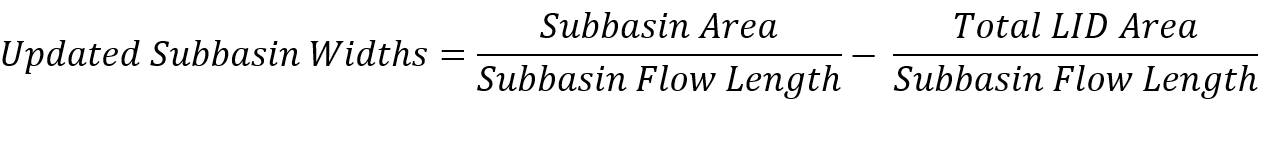

In [69]:
display.Image(r"C:\Users\R. Seth Herbst\Downloads\Width equation.png")

In [70]:
#initialize a baseline model object in swmmio
baseline = sio.Model(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM')

#isolate subcatchments dataframe
subcatchments = baseline.inp.subcatchments

#Set subcatchment parameters

#Percent Impervious Adjustments

subcatchments.loc['73081','PercImperv'] = updated_sb_impervious_areas['73081']
subcatchments.loc['72671','PercImperv'] = updated_sb_impervious_areas['72671']
subcatchments.loc['72591','PercImperv'] = updated_sb_impervious_areas['72591']
subcatchments.loc['72631','PercImperv'] = updated_sb_impervious_areas['72631']
subcatchments.loc['72781','PercImperv'] = updated_sb_impervious_areas['72781']
subcatchments.loc['72731','PercImperv'] = updated_sb_impervious_areas['72731']
subcatchments.loc['72951','PercImperv'] = updated_sb_impervious_areas['72951']
subcatchments.loc['73211','PercImperv'] = updated_sb_impervious_areas['73211']
subcatchments.loc['73181','PercImperv'] = updated_sb_impervious_areas['73181']
subcatchments.loc['73171','PercImperv'] = updated_sb_impervious_areas['73171']
subcatchments.loc['73121','PercImperv'] = updated_sb_impervious_areas['73121']
subcatchments.loc['73201','PercImperv'] = updated_sb_impervious_areas['73201']
subcatchments.loc['73301','PercImperv'] = updated_sb_impervious_areas['73301']
subcatchments.loc['73321','PercImperv'] = updated_sb_impervious_areas['73321']
subcatchments.loc['73391','PercImperv'] = updated_sb_impervious_areas['73391']
subcatchments.loc['73461','PercImperv'] = updated_sb_impervious_areas['73461']
subcatchments.loc['73551','PercImperv'] = updated_sb_impervious_areas['73551']
subcatchments.loc['73421','PercImperv'] = updated_sb_impervious_areas['73421']
subcatchments.loc['73531','PercImperv'] = updated_sb_impervious_areas['73531']
subcatchments.loc['73571','PercImperv'] = updated_sb_impervious_areas['73571']

#Width Adjustment((SUBBASIN AREA/Flow Length) - LID Width)

subcatchments.loc['73081','Width'] = ((subcatchments.loc['73081','Area'] * 43560)/subbasin_flowlengths['73081']) - (lid_total_areas['73081']/subbasin_flowlengths['73081'])
subcatchments.loc['72671','Width'] = ((subcatchments.loc['72671','Area'] * 43560)/subbasin_flowlengths['72671']) - (lid_total_areas['73461']/subbasin_flowlengths['72671'])
subcatchments.loc['72591','Width'] = ((subcatchments.loc['72591','Area'] * 43560)/subbasin_flowlengths['72591']) - (lid_total_areas['72591']/subbasin_flowlengths['72591'])
subcatchments.loc['72631','Width'] = ((subcatchments.loc['72631','Area'] * 43560)/subbasin_flowlengths['72631']) - (lid_total_areas['72631']/subbasin_flowlengths['72631'])
subcatchments.loc['72781','Width'] = ((subcatchments.loc['72781','Area'] * 43560)/subbasin_flowlengths['72781']) - (lid_total_areas['72781']/subbasin_flowlengths['72781'])
subcatchments.loc['72731','Width'] = ((subcatchments.loc['72731','Area'] * 43560)/subbasin_flowlengths['72731']) - (lid_total_areas['72731']/subbasin_flowlengths['72731'])
subcatchments.loc['72951','Width'] = ((subcatchments.loc['72951','Area'] * 43560)/subbasin_flowlengths['72951']) - (lid_total_areas['72951']/subbasin_flowlengths['72951'])
subcatchments.loc['73211','Width'] = ((subcatchments.loc['73211','Area'] * 43560)/subbasin_flowlengths['73211']) - (lid_total_areas['73211']/subbasin_flowlengths['73211'])
subcatchments.loc['73181','Width'] = ((subcatchments.loc['73181','Area'] * 43560)/subbasin_flowlengths['73181']) - (lid_total_areas['73181']/subbasin_flowlengths['73181'])
subcatchments.loc['73171','Width'] = ((subcatchments.loc['73171','Area'] * 43560)/subbasin_flowlengths['73171']) - (lid_total_areas['73171']/subbasin_flowlengths['73171'])
subcatchments.loc['73121','Width'] = ((subcatchments.loc['73121','Area'] * 43560)/subbasin_flowlengths['73121']) - (lid_total_areas['73121']/subbasin_flowlengths['73121'])
subcatchments.loc['73201','Width'] = ((subcatchments.loc['73201','Area'] * 43560)/subbasin_flowlengths['73201']) - (lid_total_areas['73201']/subbasin_flowlengths['73201'])
subcatchments.loc['73301','Width'] = ((subcatchments.loc['73301','Area'] * 43560)/subbasin_flowlengths['73301']) - (lid_total_areas['73301']/subbasin_flowlengths['73301'])
subcatchments.loc['73321','Width'] = ((subcatchments.loc['73321','Area'] * 43560)/subbasin_flowlengths['73321']) - (lid_total_areas['73321']/subbasin_flowlengths['73321'])
subcatchments.loc['73391','Width'] = ((subcatchments.loc['73391','Area'] * 43560)/subbasin_flowlengths['73391']) - (lid_total_areas['73391']/subbasin_flowlengths['73391'])
subcatchments.loc['73461','Width'] = ((subcatchments.loc['73461','Area'] * 43560)/subbasin_flowlengths['73461']) - (lid_total_areas['73461']/subbasin_flowlengths['73461'])
subcatchments.loc['73551','Width'] = ((subcatchments.loc['73551','Area'] * 43560)/subbasin_flowlengths['73551']) - (lid_total_areas['73551']/subbasin_flowlengths['73551'])
subcatchments.loc['73421','Width'] = ((subcatchments.loc['73421','Area'] * 43560)/subbasin_flowlengths['73421']) - (lid_total_areas['73421']/subbasin_flowlengths['73421'])
subcatchments.loc['73531','Width'] = ((subcatchments.loc['73531','Area'] * 43560)/subbasin_flowlengths['73531']) - (lid_total_areas['73531']/subbasin_flowlengths['73531'])
subcatchments.loc['73571','Width'] = ((subcatchments.loc['73571','Area'] * 43560)/subbasin_flowlengths['73571']) - (lid_total_areas['73571']/subbasin_flowlengths['73571'])

#save subcatchment dataframe changes to whole inp dataframe
baseline.inp.subcatchments = subcatchments

#create the new inp file to use. 
newfilepath = os.path.join(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS", baseline.inp.name + "_" + 'Adjusted_SB_Parameters' + '.inp')
    
#Write the subcatchment section of the new model with the adjusted data

baseline.inp.save(newfilepath)

# 

# PYSWMM simulation with LID adjustments

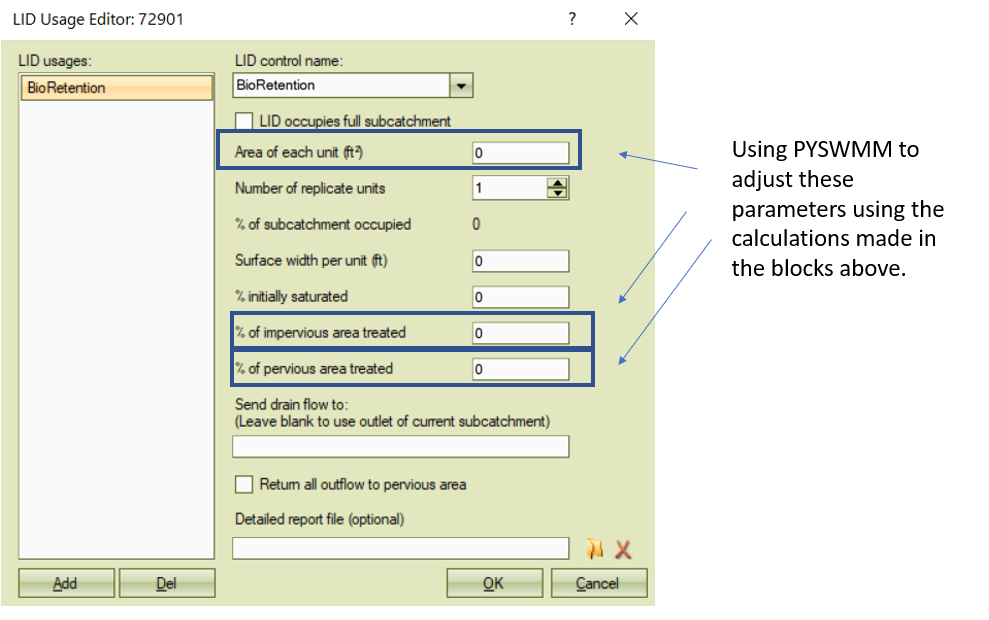

In [71]:
display.Image(r"C:\Users\R. Seth Herbst\Downloads\whatpyswmmchanges.png")

In [72]:
with Simulation(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.inp", reportfile = r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt') as sim:
    
    
    control_time_step = 86400*3
    sim.step_advance(control_time_step)
    
    
    #Load in subcatchment lid list
    
    lid_sub_73081 = LidGroups(sim)['73081']
    lid_sub_72671 = LidGroups(sim)['72671']
    lid_sub_72591 = LidGroups(sim)['72591']
    lid_sub_72631 = LidGroups(sim)['72631']
    lid_sub_72781 = LidGroups(sim)['72781']
    lid_sub_72731 = LidGroups(sim)['72731']
    lid_sub_72951 = LidGroups(sim)['72951']
    lid_sub_73211 = LidGroups(sim)['73211']
    lid_sub_73181 = LidGroups(sim)['73181']
    lid_sub_73171 = LidGroups(sim)['73171']
    lid_sub_73121 = LidGroups(sim)['73121']
    lid_sub_73201 = LidGroups(sim)['73201']
    lid_sub_73301 = LidGroups(sim)['73301']
    lid_sub_73321 = LidGroups(sim)['73321']
    lid_sub_73391 = LidGroups(sim)['73391']
    lid_sub_73461 = LidGroups(sim)['73461']
    lid_sub_73551 = LidGroups(sim)['73551']
    lid_sub_73421 = LidGroups(sim)['73421']
    lid_sub_73531 = LidGroups(sim)['73531']
    lid_sub_73571 = LidGroups(sim)['73571']
    
    
#     #Set LID Areas!
    
    lid_sub_73081[0].unit_area = greenroof_assigned_areas['73081']
    lid_sub_73081[1].unit_area = permeablepavement_assigned_areas['73081']
    lid_sub_73081[2].unit_area = raingarden_assigned_areas['73081']
    lid_sub_73081[3].unit_area = bioretention_assigned_areas['73081']
    lid_sub_73081[4].unit_area = grassswale_assigned_areas['73081']
    
    lid_sub_72671[0].unit_area = greenroof_assigned_areas['72671']
    lid_sub_72671[1].unit_area = permeablepavement_assigned_areas['72671']
    lid_sub_72671[2].unit_area = raingarden_assigned_areas['72671']
    lid_sub_72671[3].unit_area = bioretention_assigned_areas['72671']
    lid_sub_72671[4].unit_area = grassswale_assigned_areas['72671']
    
    lid_sub_72591[0].unit_area = greenroof_assigned_areas['72591']
    lid_sub_72591[1].unit_area = permeablepavement_assigned_areas['72591']
    lid_sub_72591[2].unit_area = raingarden_assigned_areas['72591']
    lid_sub_72591[3].unit_area = bioretention_assigned_areas['72591']
    lid_sub_72591[4].unit_area = grassswale_assigned_areas['72591']
    
    lid_sub_72631[0].unit_area = greenroof_assigned_areas['72631']
    lid_sub_72631[1].unit_area = permeablepavement_assigned_areas['72631']
    lid_sub_72631[2].unit_area = raingarden_assigned_areas['72631']
    lid_sub_72631[3].unit_area = bioretention_assigned_areas['72631']
    lid_sub_72631[4].unit_area = grassswale_assigned_areas['72631']
    
    lid_sub_72781[0].unit_area = greenroof_assigned_areas['72781']
    lid_sub_72781[1].unit_area = permeablepavement_assigned_areas['72781']
    lid_sub_72781[2].unit_area = raingarden_assigned_areas['72781']
    lid_sub_72781[3].unit_area = bioretention_assigned_areas['72781']
    lid_sub_72781[4].unit_area = grassswale_assigned_areas['72781']
    
    lid_sub_72731[0].unit_area = greenroof_assigned_areas['72731']
    lid_sub_72731[1].unit_area = permeablepavement_assigned_areas['72731']
    lid_sub_72731[2].unit_area = raingarden_assigned_areas['72731']
    lid_sub_72731[3].unit_area = bioretention_assigned_areas['72731']
    lid_sub_72731[4].unit_area = grassswale_assigned_areas['72731']
    
    lid_sub_72951[0].unit_area = greenroof_assigned_areas['72951']
    lid_sub_72951[1].unit_area = permeablepavement_assigned_areas['72951']
    lid_sub_72951[2].unit_area = raingarden_assigned_areas['72951']
    lid_sub_72951[3].unit_area = bioretention_assigned_areas['72951']
    lid_sub_72951[4].unit_area = grassswale_assigned_areas['72951']
    
    lid_sub_73211[0].unit_area = greenroof_assigned_areas['73211']
    lid_sub_73211[1].unit_area = permeablepavement_assigned_areas['73211']
    lid_sub_73211[2].unit_area = raingarden_assigned_areas['73211']
    lid_sub_73211[3].unit_area = bioretention_assigned_areas['73211']
    lid_sub_73211[4].unit_area = grassswale_assigned_areas['73211']
    
    lid_sub_73181[0].unit_area = greenroof_assigned_areas['73181']
    lid_sub_73181[1].unit_area = permeablepavement_assigned_areas['73181']
    lid_sub_73181[2].unit_area = raingarden_assigned_areas['73181']
    lid_sub_73181[3].unit_area = bioretention_assigned_areas['73181']
    lid_sub_73181[4].unit_area = grassswale_assigned_areas['73181']
    
    lid_sub_73171[0].unit_area = greenroof_assigned_areas['73171']
    lid_sub_73171[1].unit_area = permeablepavement_assigned_areas['73171']
    lid_sub_73171[2].unit_area = raingarden_assigned_areas['73171']
    lid_sub_73171[3].unit_area = bioretention_assigned_areas['73171']
    lid_sub_73171[4].unit_area = grassswale_assigned_areas['73171']
    
    lid_sub_73121[0].unit_area = greenroof_assigned_areas['73121']
    lid_sub_73121[1].unit_area = permeablepavement_assigned_areas['73121']
    lid_sub_73121[2].unit_area = raingarden_assigned_areas['73121']
    lid_sub_73121[3].unit_area = bioretention_assigned_areas['73121']
    lid_sub_73121[4].unit_area = grassswale_assigned_areas['73121']
    
    lid_sub_73201[0].unit_area = greenroof_assigned_areas['73201']
    lid_sub_73201[1].unit_area = permeablepavement_assigned_areas['73201']
    lid_sub_73201[2].unit_area = raingarden_assigned_areas['73201']
    lid_sub_73201[3].unit_area = bioretention_assigned_areas['73201']
    lid_sub_73201[4].unit_area = grassswale_assigned_areas['73201']
    
    lid_sub_73301[0].unit_area = greenroof_assigned_areas['73301']
    lid_sub_73301[1].unit_area = permeablepavement_assigned_areas['73301']
    lid_sub_73301[2].unit_area = raingarden_assigned_areas['73301']
    lid_sub_73301[3].unit_area = bioretention_assigned_areas['73301']
    lid_sub_73301[4].unit_area = grassswale_assigned_areas['73301']
    
    lid_sub_73321[0].unit_area = greenroof_assigned_areas['73321']
    lid_sub_73321[1].unit_area = permeablepavement_assigned_areas['73321']
    lid_sub_73321[2].unit_area = raingarden_assigned_areas['73321']
    lid_sub_73321[3].unit_area = bioretention_assigned_areas['73321']
    lid_sub_73321[4].unit_area = grassswale_assigned_areas['73321']
    
    lid_sub_73391[0].unit_area = greenroof_assigned_areas['73391']
    lid_sub_73391[1].unit_area = permeablepavement_assigned_areas['73391']
    lid_sub_73391[2].unit_area = raingarden_assigned_areas['73391']
    lid_sub_73391[3].unit_area = bioretention_assigned_areas['73391']
    lid_sub_73391[4].unit_area = grassswale_assigned_areas['73391']
    
    lid_sub_73461[0].unit_area = greenroof_assigned_areas['73461']
    lid_sub_73461[1].unit_area = permeablepavement_assigned_areas['73461']
    lid_sub_73461[2].unit_area = raingarden_assigned_areas['73461']
    lid_sub_73461[3].unit_area = bioretention_assigned_areas['73461']
    lid_sub_73461[4].unit_area = grassswale_assigned_areas['73461']
    
    lid_sub_73551[0].unit_area = greenroof_assigned_areas['73551']
    lid_sub_73551[1].unit_area = permeablepavement_assigned_areas['73551']
    lid_sub_73551[2].unit_area = raingarden_assigned_areas['73551']
    lid_sub_73551[3].unit_area = bioretention_assigned_areas['73551']
    lid_sub_73551[4].unit_area = grassswale_assigned_areas['73551']
    
    lid_sub_73421[0].unit_area = greenroof_assigned_areas['73421']
    lid_sub_73421[1].unit_area = permeablepavement_assigned_areas['73421']
    lid_sub_73421[2].unit_area = raingarden_assigned_areas['73421']
    lid_sub_73421[3].unit_area = bioretention_assigned_areas['73421']
    lid_sub_73421[4].unit_area = grassswale_assigned_areas['73421']
    
    lid_sub_73531[0].unit_area = greenroof_assigned_areas['73531']
    lid_sub_73531[1].unit_area = permeablepavement_assigned_areas['73531']
    lid_sub_73531[2].unit_area = raingarden_assigned_areas['73531']
    lid_sub_73531[3].unit_area = bioretention_assigned_areas['73531']
    lid_sub_73531[4].unit_area = grassswale_assigned_areas['73531']
    
    lid_sub_73571[0].unit_area = greenroof_assigned_areas['73571']
    lid_sub_73571[1].unit_area = permeablepavement_assigned_areas['73571']
    lid_sub_73571[2].unit_area = raingarden_assigned_areas['73571']
    lid_sub_73571[3].unit_area = bioretention_assigned_areas['73571']
    lid_sub_73571[4].unit_area = grassswale_assigned_areas['73571']
    
    
    
#Set Percent Impervious Areas Treated
    
    lid_sub_73081[1].from_impervious = permeablepavement_percimpervtreated['73081']
    lid_sub_73081[2].from_impervious = raingarden_percimpervareatreated['73081']
    lid_sub_73081[3].from_impervious = bioretention_percimpervareatreated['73081']
    lid_sub_73081[4].from_impervious = grassswale_percimpervareatreated['73081']
    
    lid_sub_72671[1].from_impervious = permeablepavement_percimpervtreated['72671']
    lid_sub_72671[2].from_impervious = raingarden_percimpervareatreated['72671']
    lid_sub_72671[3].from_impervious = bioretention_percimpervareatreated['72671']
    lid_sub_72671[4].from_impervious = grassswale_percimpervareatreated['72671']
    
    lid_sub_72591[1].from_impervious = permeablepavement_percimpervtreated['72591']
    lid_sub_72591[2].from_impervious = raingarden_percimpervareatreated['72591']
    lid_sub_72591[3].from_impervious = bioretention_percimpervareatreated['72591']
    lid_sub_72591[4].from_impervious = grassswale_percimpervareatreated['72591']
    
    lid_sub_72631[1].from_impervious = permeablepavement_percimpervtreated['72631']
    lid_sub_72631[2].from_impervious = raingarden_percimpervareatreated['72631']
    lid_sub_72631[3].from_impervious = bioretention_percimpervareatreated['72631']
    lid_sub_72631[4].from_impervious = grassswale_percimpervareatreated['72631']
    
    lid_sub_72781[1].from_impervious = permeablepavement_percimpervtreated['72781']
    lid_sub_72781[2].from_impervious = raingarden_percimpervareatreated['72781']
    lid_sub_72781[3].from_impervious = bioretention_percimpervareatreated['72781']
    lid_sub_72781[4].from_impervious = grassswale_percimpervareatreated['72781']
    
    lid_sub_72731[1].from_impervious = permeablepavement_percimpervtreated['72731']
    lid_sub_72731[2].from_impervious = raingarden_percimpervareatreated['72731']
    lid_sub_72731[3].from_impervious = bioretention_percimpervareatreated['72731']
    lid_sub_72731[4].from_impervious = grassswale_percimpervareatreated['72731']
    
    lid_sub_72951[1].from_impervious = permeablepavement_percimpervtreated['72951']
    lid_sub_72951[2].from_impervious = raingarden_percimpervareatreated['72951']
    lid_sub_72951[3].from_impervious = bioretention_percimpervareatreated['72951']
    lid_sub_72951[4].from_impervious = grassswale_percimpervareatreated['72951']
    
    
    lid_sub_73211[1].from_impervious = permeablepavement_percimpervtreated['73211']
    lid_sub_73211[2].from_impervious = raingarden_percimpervareatreated['73211']
    lid_sub_73211[3].from_impervious = bioretention_percimpervareatreated['73211']
    lid_sub_73211[4].from_impervious = grassswale_percimpervareatreated['73211']
    
    lid_sub_73181[1].from_impervious = permeablepavement_percimpervtreated['73181']
    lid_sub_73181[2].from_impervious = raingarden_percimpervareatreated['73181']
    lid_sub_73181[3].from_impervious = bioretention_percimpervareatreated['73181']
    lid_sub_73181[4].from_impervious = grassswale_percimpervareatreated['73181']
    
    lid_sub_73171[1].from_impervious = permeablepavement_percimpervtreated['73171']
    lid_sub_73171[2].from_impervious = raingarden_percimpervareatreated['73171']
    lid_sub_73171[3].from_impervious = bioretention_percimpervareatreated['73171']
    lid_sub_73171[4].from_impervious = grassswale_percimpervareatreated['73171']
    
    lid_sub_73121[1].from_impervious = permeablepavement_percimpervtreated['73121']
    lid_sub_73121[2].from_impervious = raingarden_percimpervareatreated['73121']
    lid_sub_73121[3].from_impervious = bioretention_percimpervareatreated['73121']
    lid_sub_73121[4].from_impervious = grassswale_percimpervareatreated['73121']
    
    lid_sub_73201[1].from_impervious = permeablepavement_percimpervtreated['73201']
    lid_sub_73201[2].from_impervious = raingarden_percimpervareatreated['73201']
    lid_sub_73201[3].from_impervious = bioretention_percimpervareatreated['73201']
    lid_sub_73201[4].from_impervious = grassswale_percimpervareatreated['73201']
    
    lid_sub_73301[1].from_impervious = permeablepavement_percimpervtreated['73301']
    lid_sub_73301[2].from_impervious = raingarden_percimpervareatreated['73301']
    lid_sub_73301[3].from_impervious = bioretention_percimpervareatreated['73301']
    lid_sub_73301[4].from_impervious = grassswale_percimpervareatreated['73301']
    
    lid_sub_73321[1].from_impervious = permeablepavement_percimpervtreated['73321']
    lid_sub_73321[2].from_impervious = raingarden_percimpervareatreated['73321']
    lid_sub_73321[3].from_impervious = bioretention_percimpervareatreated['73321']
    lid_sub_73321[4].from_impervious = grassswale_percimpervareatreated['73321']
    
    lid_sub_73391[1].from_impervious = permeablepavement_percimpervtreated['73391']
    lid_sub_73391[2].from_impervious = raingarden_percimpervareatreated['73391']
    lid_sub_73391[3].from_impervious = bioretention_percimpervareatreated['73391']
    lid_sub_73391[4].from_impervious = grassswale_percimpervareatreated['73391']
    
    lid_sub_73461[1].from_impervious = permeablepavement_percimpervtreated['73461']
    lid_sub_73461[2].from_impervious = raingarden_percimpervareatreated['73461']
    lid_sub_73461[3].from_impervious = bioretention_percimpervareatreated['73461']
    lid_sub_73461[4].from_impervious = grassswale_percimpervareatreated['73461']
    
    lid_sub_73551[1].from_impervious = permeablepavement_percimpervtreated['73551']
    lid_sub_73551[2].from_impervious = raingarden_percimpervareatreated['73551']
    lid_sub_73551[3].from_impervious = bioretention_percimpervareatreated['73551']
    lid_sub_73551[4].from_impervious = grassswale_percimpervareatreated['73551']
    
    lid_sub_73421[1].from_impervious = permeablepavement_percimpervtreated['73421']
    lid_sub_73421[2].from_impervious = raingarden_percimpervareatreated['73421']
    lid_sub_73421[3].from_impervious = bioretention_percimpervareatreated['73421']
    lid_sub_73421[4].from_impervious = grassswale_percimpervareatreated['73421']
    
    lid_sub_73531[1].from_impervious = permeablepavement_percimpervtreated['73531']
    lid_sub_73531[2].from_impervious = raingarden_percimpervareatreated['73531']
    lid_sub_73531[3].from_impervious = bioretention_percimpervareatreated['73531']
    lid_sub_73531[4].from_impervious = grassswale_percimpervareatreated['73531']
    
    lid_sub_73571[1].from_impervious = permeablepavement_percimpervtreated['73571']
    lid_sub_73571[2].from_impervious = raingarden_percimpervareatreated['73571']
    lid_sub_73571[3].from_impervious = bioretention_percimpervareatreated['73571']
    lid_sub_73571[4].from_impervious = grassswale_percimpervareatreated['73571']

# Set % Pervious Areas Treated
    
    lid_sub_73081[2].from_pervious = raingarden_percpervareatreated['73081']
    lid_sub_73081[3].from_pervious = bioretention_percpervareatreated['73081']
    lid_sub_73081[4].from_pervious = grassswale_percpervareatreated['73081']
    
    lid_sub_72671[2].from_pervious = raingarden_percpervareatreated['72671']
    lid_sub_72671[3].from_pervious = bioretention_percpervareatreated['72671']
    lid_sub_72671[4].from_pervious = grassswale_percpervareatreated['72671']
    
    lid_sub_72591[2].from_pervious = raingarden_percpervareatreated['72591']
    lid_sub_72591[3].from_pervious = bioretention_percpervareatreated['72591']
    lid_sub_72591[4].from_pervious = grassswale_percpervareatreated['72591']
    
    lid_sub_72631[2].from_pervious = raingarden_percpervareatreated['72631']
    lid_sub_72631[3].from_pervious = bioretention_percpervareatreated['72631']
    lid_sub_72631[4].from_pervious = grassswale_percpervareatreated['72631']
    
    lid_sub_72781[2].from_pervious = raingarden_percpervareatreated['72781']
    lid_sub_72781[3].from_pervious = bioretention_percpervareatreated['72781']
    lid_sub_72781[4].from_pervious = grassswale_percpervareatreated['72781']
    
    lid_sub_72731[2].from_pervious = raingarden_percpervareatreated['72731']
    lid_sub_72731[3].from_pervious = bioretention_percpervareatreated['72731']
    lid_sub_72731[4].from_pervious = grassswale_percpervareatreated['72731']
    
    lid_sub_72951[2].from_pervious = raingarden_percpervareatreated['72951']
    lid_sub_72951[3].from_pervious = bioretention_percpervareatreated['72951']
    lid_sub_72951[4].from_pervious = grassswale_percpervareatreated['72951']
    
    lid_sub_73211[2].from_pervious = raingarden_percpervareatreated['73211']
    lid_sub_73211[3].from_pervious = bioretention_percpervareatreated['73211']
    lid_sub_73211[4].from_pervious = grassswale_percpervareatreated['73211']
    
    lid_sub_73181[2].from_pervious = raingarden_percpervareatreated['73181']
    lid_sub_73181[3].from_pervious = bioretention_percpervareatreated['73181']
    lid_sub_73181[4].from_pervious = grassswale_percpervareatreated['73181']
    
    lid_sub_73171[2].from_pervious = raingarden_percpervareatreated['73171']
    lid_sub_73171[3].from_pervious = bioretention_percpervareatreated['73171']
    lid_sub_73171[4].from_pervious = grassswale_percpervareatreated['73171']
    
    lid_sub_73121[2].from_pervious = raingarden_percpervareatreated['73121']
    lid_sub_73121[3].from_pervious = bioretention_percpervareatreated['73121']
    lid_sub_73121[4].from_pervious = grassswale_percpervareatreated['73121']
    
    lid_sub_73201[2].from_pervious = raingarden_percpervareatreated['73201']
    lid_sub_73201[3].from_pervious = bioretention_percpervareatreated['73201']
    lid_sub_73201[4].from_pervious = grassswale_percpervareatreated['73201']
    
    lid_sub_73301[2].from_pervious = raingarden_percpervareatreated['73301']
    lid_sub_73301[3].from_pervious = bioretention_percpervareatreated['73301']
    lid_sub_73301[4].from_pervious = grassswale_percpervareatreated['73301']
    
    lid_sub_73321[2].from_pervious = raingarden_percpervareatreated['73321']
    lid_sub_73321[3].from_pervious = bioretention_percpervareatreated['73321']
    lid_sub_73321[4].from_pervious = grassswale_percpervareatreated['73321']
    
    lid_sub_73391[2].from_pervious = raingarden_percpervareatreated['73391']
    lid_sub_73391[3].from_pervious = bioretention_percpervareatreated['73391']
    lid_sub_73391[4].from_pervious = grassswale_percpervareatreated['73391']
    
    lid_sub_73461[2].from_pervious = raingarden_percpervareatreated['73461']
    lid_sub_73461[3].from_pervious = bioretention_percpervareatreated['73461']
    lid_sub_73461[4].from_pervious = grassswale_percpervareatreated['73461']
    
    lid_sub_73551[2].from_pervious = raingarden_percpervareatreated['73551']
    lid_sub_73551[3].from_pervious = bioretention_percpervareatreated['73551']
    lid_sub_73551[4].from_pervious = grassswale_percpervareatreated['73551']
    
    lid_sub_73421[2].from_pervious = raingarden_percpervareatreated['73421']
    lid_sub_73421[3].from_pervious = bioretention_percpervareatreated['73421']
    lid_sub_73421[4].from_pervious = grassswale_percpervareatreated['73421']
    
    lid_sub_73531[2].from_pervious = raingarden_percpervareatreated['73531']
    lid_sub_73531[3].from_pervious = bioretention_percpervareatreated['73531']
    lid_sub_73531[4].from_pervious = grassswale_percpervareatreated['73531']
    
    lid_sub_73571[2].from_pervious = raingarden_percpervareatreated['73571']
    lid_sub_73571[3].from_pervious = bioretention_percpervareatreated['73571']
    lid_sub_73571[4].from_pervious = grassswale_percpervareatreated['73571']


    
# Run the simulation
    for step in sim:
        pass
    sim.report()
    sim.close()
                       
                       


## 

# Results Analysis!!

## 

## Subcatchment 73081

In [73]:
# This is for your Subcatchment 73081
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73081 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6339, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73081.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73081.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

In [74]:
pd.set_option('max_columns', None)
rpt_73081.head()

,Date,Precip (in/hr),Losses (in/hr),Runoff (CFS),Total Nitrogen (mg/L),Total Phosphorous (mg/L)
0,01/01/2000 00:30:00,0.011,0.0,0.0000,0.000,0.000
1,01/01/2000 01:00:00,0.011,0.0,0.0421,0.833,0.268
2,01/01/2000 01:30:00,0.011,0.0,0.0568,0.867,0.279
3,01/01/2000 02:00:00,0.013,0.0,0.0642,0.879,0.283
4,01/01/2000 02:30:00,0.013,0.0,0.0749,0.878,0.283


### Peak Runoff

In [75]:
rpt_73081['Runoff (CFS)'].mean()

0.885405128205128

### Nitrogen Load (grams)

In [76]:
(rpt_73081['Runoff (CFS)'].mean() * rpt_73081['Total Nitrogen (mg/L)'].mean() * 28.3168 * 1800) /1000

27.25810437663507

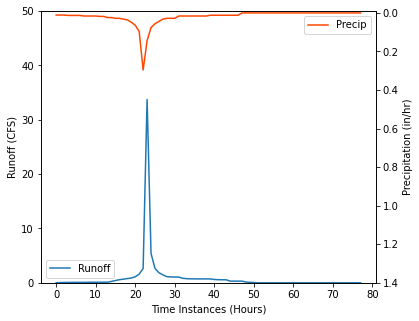

In [77]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73081['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73081['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72671

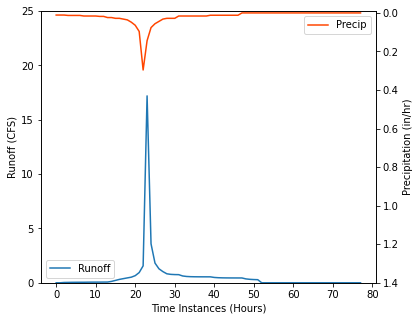

In [78]:
# This is for your Subcatchment 72671
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72671 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5829, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72671.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72671.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72671['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72671['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72591

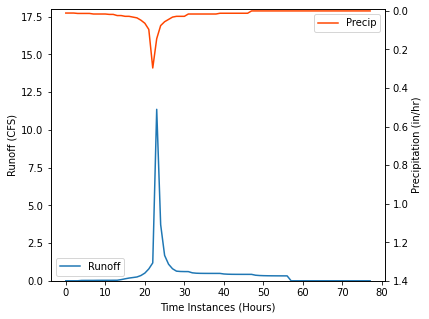

In [79]:
# This is for your Subcatchment 72591
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72591 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5659, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72591.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72591.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72591['Runoff (CFS)']); plt.ylim((-0.001,18)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72591['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72631

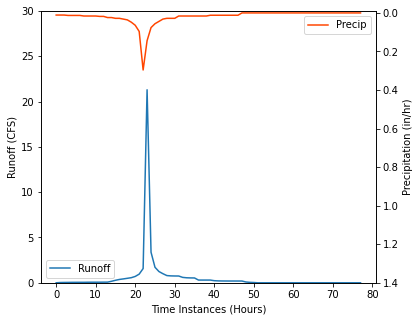

In [80]:
# This is for your Subcatchment 72631
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72631 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5744, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72631.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72631.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72631['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72631['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72781

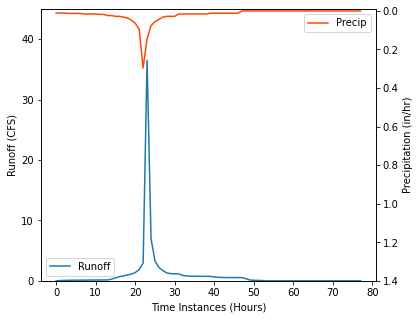

In [81]:
# This is for your Subcatchment 72781
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72781 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5999, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72781.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72781.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72781['Runoff (CFS)']); plt.ylim((-0.001,45)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72781['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72731

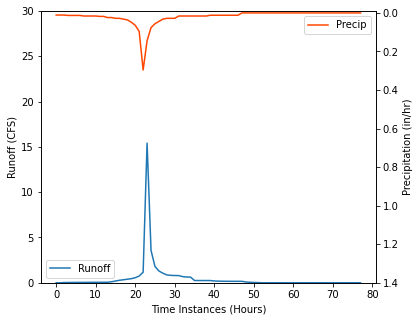

In [82]:
# This is for your Subcatchment 72731
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72731 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5914, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72731.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72731.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72731['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72731['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72951

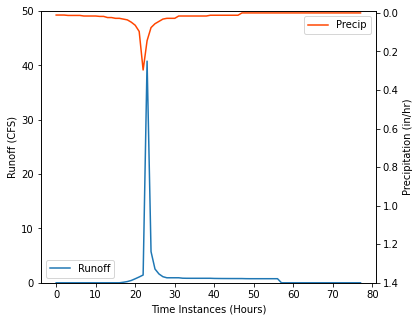

In [83]:
# This is for your Subcatchment 72951
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72951 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6169, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72951.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72951.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72951['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72951['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


## Subcatchment 73211

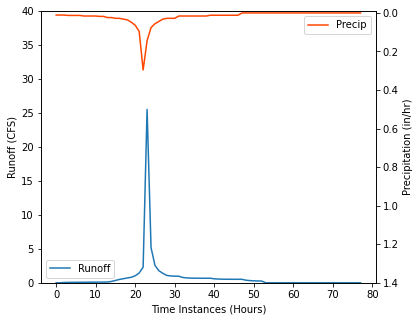

In [84]:
# This is for your Subcatchment 73211
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73211 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6764, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73211.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73211.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73211['Runoff (CFS)']); plt.ylim((-0.001,40)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73211['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73181

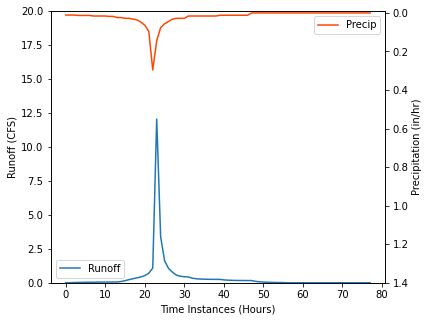

In [85]:
# This is for your Subcatchment 73181
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73181 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6594, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73181.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73181.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73181['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73181['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73171

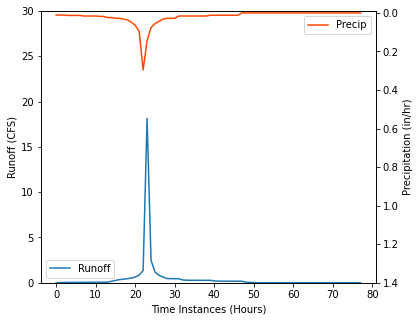

In [86]:
# This is for your Subcatchment 73171
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73171 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6509, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73171.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73171.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73171['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73171['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73121

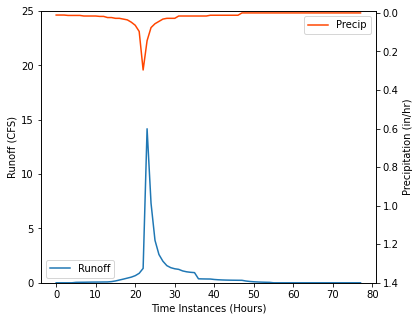

In [87]:
# This is for your Subcatchment 73121
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73121 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6424, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73121.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73121.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73121['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73121['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73201

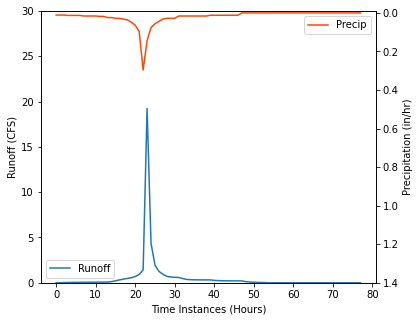

In [88]:
# This is for your Subcatchment 73201
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73201 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6679, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73201.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73201.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73201['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73201['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73301

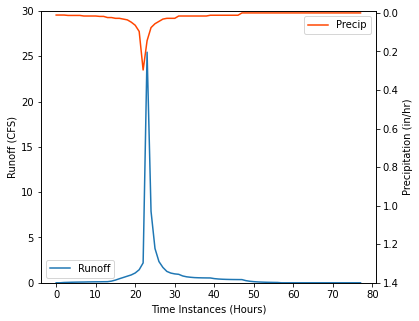

In [89]:
## This is for your Subcatchment 73301
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73301 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6934, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73301.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73301.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73301['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73301['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73321

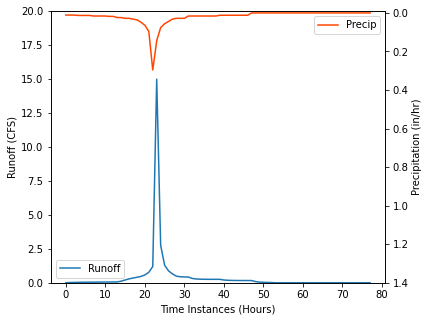

In [90]:
# This is for your Subcatchment 73321
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73321 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7019, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73321.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73321.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73321['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73321['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73391

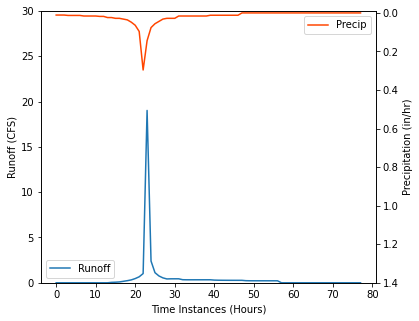

In [91]:
# This is for your Subcatchment 73391
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73391 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7189, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73391.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73391.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73391['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73391['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73551

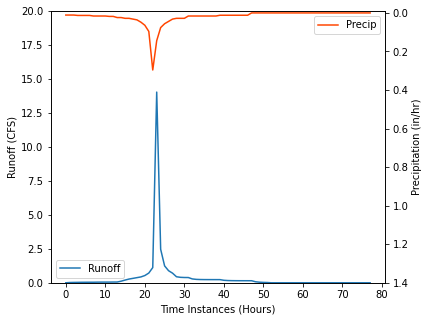

In [92]:
# This is for your Subcatchment 73551
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73551 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7699, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73551.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73551.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73551['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73551['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73421

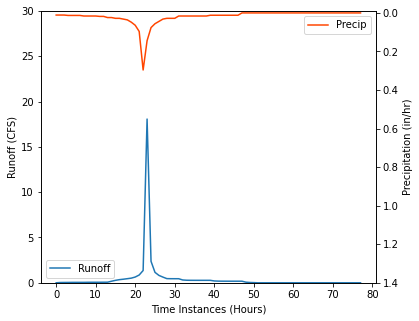

In [93]:
# This is for your Subcatchment 73421
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73421 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7359, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73421.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73421.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73421['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73421['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73531

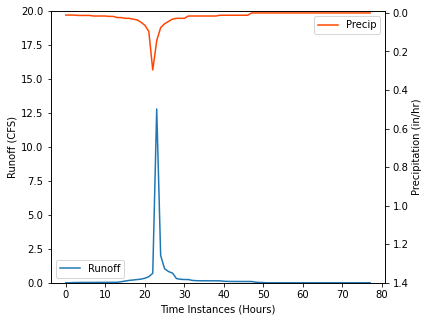

In [94]:
# This is for your Subcatchment 73531
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73531 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7614, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73531.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73531.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73531['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73531['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

In [95]:
rpt_73531.max()

Date                        01/02/2000 15:00:00
Precip (in/hr)                            0.296
Losses (in/hr)                            0.036
Runoff (CFS)                            12.7874
Total Nitrogen (mg/L)                     1.154
Total Phosphorous (mg/L)                  0.299
dtype: object

## Subcatchment 73571

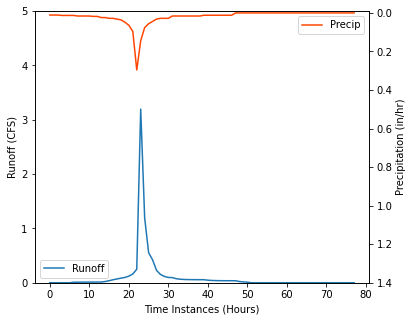

In [96]:
# This is for your Subcatchment 73571
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73571 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7784, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73571.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73571.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73571['Runoff (CFS)']); plt.ylim((-0.001,5)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73571['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73461

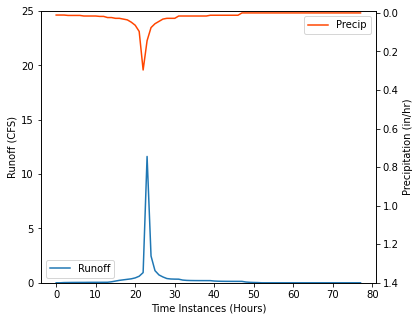

In [97]:
# This is for your Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7444, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)


fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


In [98]:
rpt_73461

,Date,Precip (in/hr),Losses (in/hr),Runoff (CFS),Total Nitrogen (mg/L),Total Phosphorous (mg/L)
0,01/01/2000 00:30:00,0.011,0.0,0.0000,0.000,0.000
1,01/01/2000 01:00:00,0.011,0.0,0.0000,0.000,0.000
2,01/01/2000 01:30:00,0.011,0.0,0.0209,0.668,0.173
3,01/01/2000 02:00:00,0.013,0.0,0.0250,0.727,0.188
4,01/01/2000 02:30:00,0.013,0.0,0.0300,0.732,0.189
...,...,...,...,...,...,...
73,01/02/2000 13:00:00,0.000,0.0,0.0000,0.000,0.000
74,01/02/2000 13:30:00,0.000,0.0,0.0000,0.000,0.000
75,01/02/2000 14:00:00,0.000,0.0,0.0000,0.000,0.000
76,01/02/2000 14:30:00,0.000,0.0,0.0000,0.000,0.000


# Outflow near MC7 (In stream, near outlet of SWMM Model)


### No LID Scenario for Comparison
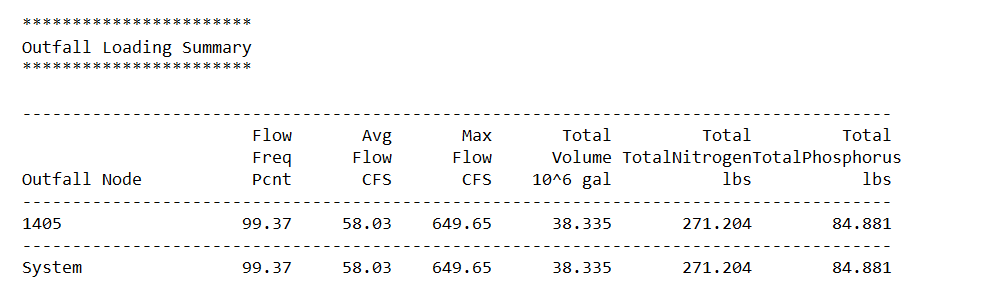

In [99]:
# Outfall
reportColumns = [str(i) for i in np.arange(0,15)]
rpt_1405 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 37646, nrows = 1, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_1405.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_1405.rename(columns = {'0':'Outfall Node','6':'Flow Freq %','7':'Avg Flow (CFS)','8':'Max Flow (CFS)','10':'Total Volume (10^6 Gallons)','12':'Total Nitrogen Load (lbs)','14':'Total Phosphorous (lbs)'},inplace = True)

In [100]:
rpt_1405.head()

,Outfall Node,Flow Freq %,Avg Flow (CFS),Max Flow (CFS),Total Volume (10^6 Gallons),Total Nitrogen Load (lbs),Total Phosphorous (lbs)
0,1405,99.37,54.34,588.37,36.325,248.162,78.423
